# PCA for 6 and 10 components

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [81]:

df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances_with_fingers.csv')

df_10_10inst


,videoname,axis,n_frame,n_landmark,coordinate
0,aprender_175,x,0,0,0.495806
1,aprender_175,x,0,1,0.523832
2,aprender_175,x,0,2,0.543781
3,aprender_175,x,0,3,0.561008
4,aprender_175,x,0,4,0.480482
...,...,...,...,...,...
224995,yo_3,y,12,70,0.646283
224996,yo_3,y,12,71,0.699869
224997,yo_3,y,12,72,0.687381
224998,yo_3,y,12,73,0.670055


In [3]:
df_10_10inst['n_frame'].unique

<bound method Series.unique of 0          0
1          0
2          0
3          0
4          0
          ..
224995    12
224996    12
224997    12
224998    12
224999    12
Name: n_frame, Length: 225000, dtype: int64>

In [4]:
#videoname_to_drop

In [5]:
#df_10_10inst['videoname'].head()

In [6]:
#verify the type 
#type(df_10_10inst['videoname'][0])

In [7]:
#verify the type 
#type(videoname_to_drop[0])

In [8]:
'''
for i in range (0,225000):
    if (df_10_10inst['videoname'][i] in videoname_to_drop) :
        print (i)
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range (0,225000):\n    if (df_10_10inst['videoname'][i] in videoname_to_drop) :\n        print (i)\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [9]:
'''
for i in range len(df_10_10inst):
    if (df_10_10inst['videoname'][i] in videoname_to_drop) :
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range len(df_10_10inst):\n    if (df_10_10inst['videoname'][i] in videoname_to_drop) :\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [10]:
#df_10_10inst.drop([i], axis=0, inplace=True)

In [11]:
#df_10_10inst_NEW = df_10_10inst

In [12]:
#df_10_10inst.to_csv("data_10_frames_10_instances_removed.csv")

In [13]:
'''este no va
for i in range(23,33):
    df_10_10inst.drop(df_10_10inst[df_10_10inst.n_landmark == i].index, inplace=True)
df_10_10inst.head()
'''

'este no va\nfor i in range(23,33):\n    df_10_10inst.drop(df_10_10inst[df_10_10inst.n_landmark == i].index, inplace=True)\ndf_10_10inst.head()\n'

In [14]:
df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_147' 'bien_174' 'bien_230' 'bien_241' 'bien_244' 'bien_269'
 'bien_278' 'bien_329' 'bien_337' 'bien_416' 'comer_146' 'comer_164'
 'comer_313' 'comer_477' 'comer_484' 'comer_489' 'comer_705' 'comer_743'
 'comer_779' 'comer_86' 'cuánto_405' 'cuánto_420' 'cuánto_445'
 'cuánto_448' 'cuánto_456' 'cuánto_483' 'cuánto_706' 'cuánto_708'
 'cuánto_742' 'cuánto_744' 'cómo_12' 'cómo_171' 'cómo_223' 'cómo_230'
 'cómo_387' 'cómo_427' 'cómo_44' 'cómo_85' 'cómo_9' 'cómo_90' 'decir_101'
 'decir_138' 'decir_224' 'decir_265' 'decir_276' 'decir_321' 'decir_433'
 'decir_528' 'decir_755' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_486' 'dentro_55' 'dentro_566' 'dentro_596' 'dentro_603'
 'dentro_627' 'dentro_692' 'dentro_73' 'emoción_143' 'emoción_145'
 'emoción_249' 'emoción_272' 'emoción_281' 'emoción_43' 'emoción_45'
 'emoción_54' 'emoción_71' 'emoció

In [15]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.593512,0.588091,0.613941,0.610420,0.602892,0.595942,0.616404,0.611680,0.605222,0.598328
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.608034,0.614951,0.590632,0.606269,0.613335,0.619953,0.593536,0.605816,0.612867,0.619265
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.328885,0.346725,0.340982,0.325849,0.341897,0.357955,0.358624,0.344614,0.354449,0.365527
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.218056,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916


In [16]:
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,aprender_175,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,...,0.588091,0.613941,0.610420,0.602892,0.595942,0.616404,0.611680,0.605222,0.598328,aprender
1,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
2,aprender_195,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,...,0.614951,0.590632,0.606269,0.613335,0.619953,0.593536,0.605816,0.612867,0.619265,aprender
3,aprender_217,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,...,0.346725,0.340982,0.325849,0.341897,0.357955,0.358624,0.344614,0.354449,0.365527,aprender
4,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender


In [17]:
 # Number of instances
temp_10_10inst['instance'].nunique()


150

In [18]:
# Number of classes
temp_10_10inst['classes'].nunique()

15

In [19]:
alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:1302]  #1301 columns
new_alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:1301]  #1300 columns
new_alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0.495806,0.523832,0.543781,0.561008,0.480482,0.470032,0.456728,0.594658,0.453686,0.529510,...,0.234526,0.622126,0.161885,0.627499,0.150261,0.578429,0.178895,0.569182,0.952272,0.952775
1,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,0.700457,0.406724,0.709250,0.363754,0.672436,0.346555,0.666240,0.369594,1.026453,1.018804
2,0.497058,0.520504,0.534275,0.545982,0.475575,0.459812,0.444983,0.569902,0.425907,0.531288,...,0.226772,0.618455,0.160639,0.636274,0.146810,0.597991,0.173022,0.589071,0.957307,0.939013
3,0.534864,0.561178,0.575552,0.589922,0.518197,0.505109,0.491974,0.622407,0.479705,0.565821,...,0.304121,0.436297,0.240870,0.380844,0.216867,0.362754,0.242548,0.378596,0.959415,0.933738
4,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.660636,0.375786,0.651058,0.316737,0.621840,0.297595,0.623341,0.320923,1.029457,1.019025


In [20]:
alldataset_dataset_10_10inst = alldataset_dataset_10_10inst.T.iloc[:1300,:]
alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.491842,0.486383,0.512408,0.464337,0.573642,0.488541,0.471509,0.439165,0.529019,0.493293
1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.492260,0.533556,0.525905,...,0.511996,0.513785,0.529054,0.493587,0.590780,0.511526,0.485480,0.464585,0.552916,0.510662
2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.545480,0.539205,...,0.527276,0.528099,0.544462,0.511841,0.599315,0.528798,0.496809,0.481023,0.568337,0.525759
3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.541398,0.545512,0.559569,0.529421,0.607354,0.545086,0.509445,0.494094,0.585308,0.539981
4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.467975,0.466763,0.486244,0.446601,0.554405,0.468813,0.446182,0.417041,0.513109,0.466384


In [21]:
alldataset_dataset_10_10inst.columns = ['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3']

In [22]:
alldataset_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499','feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689','feature_690','feature_691','feature_692','feature_693','feature_694','feature_695','feature_696','feature_697','feature_698','feature_699','feature_700','feature_701','feature_702','feature_703','feature_704','feature_705','feature_706','feature_707','feature_708','feature_709','feature_710','feature_711','feature_712','feature_713','feature_714','feature_715','feature_716','feature_717','feature_718',
'feature_719','feature_720','feature_721','feature_722','feature_723','feature_724','feature_725','feature_726','feature_727','feature_728','feature_729','feature_730','feature_731','feature_732','feature_733','feature_734','feature_735','feature_736','feature_737','feature_738','feature_739','feature_740','feature_741','feature_742','feature_743','feature_744','feature_745','feature_746','feature_747','feature_748','feature_749','feature_750','feature_751','feature_752','feature_753','feature_754','feature_755','feature_756','feature_757','feature_758','feature_759','feature_760','feature_761','feature_762','feature_763','feature_764','feature_765','feature_766','feature_767','feature_768','feature_769','feature_770','feature_771','feature_772','feature_773','feature_774','feature_775','feature_776','feature_777','feature_778','feature_779','feature_780','feature_781','feature_782','feature_783','feature_784','feature_785','feature_786','feature_787','feature_788','feature_789','feature_790','feature_791','feature_792','feature_793','feature_794','feature_795','feature_796','feature_797','feature_798','feature_799','feature_800','feature_801','feature_802','feature_803','feature_804','feature_805','feature_806','feature_807','feature_808','feature_809','feature_810','feature_811','feature_812','feature_813','feature_814','feature_815','feature_816','feature_817','feature_818','feature_819','feature_820','feature_821','feature_822','feature_823','feature_824','feature_825','feature_826','feature_827','feature_828','feature_829','feature_830','feature_831','feature_832','feature_833','feature_834','feature_835','feature_836','feature_837','feature_838','feature_839','feature_840','feature_841','feature_842','feature_843','feature_844','feature_845','feature_846','feature_847','feature_848','feature_849','feature_850','feature_851','feature_852','feature_853','feature_854','feature_855','feature_856','feature_857','feature_858','feature_859','feature_860','feature_861','feature_862','feature_863','feature_864','feature_865','feature_866','feature_867','feature_868','feature_869','feature_870','feature_871','feature_872','feature_873','feature_874','feature_875','feature_876','feature_877','feature_878','feature_879','feature_880','feature_881','feature_882','feature_883','feature_884','feature_885','feature_886','feature_887','feature_888','feature_889','feature_890','feature_891','feature_892','feature_893','feature_894','feature_895','feature_896','feature_897','feature_898','feature_899','feature_900','feature_901','feature_902','feature_903','feature_904','feature_905','feature_906','feature_907','feature_908','feature_909','feature_910','feature_911','feature_912','feature_913','feature_914','feature_915','feature_916','feature_917','feature_918','feature_919','feature_920','feature_921','feature_922','feature_923','feature_924','feature_925','feature_926','feature_927','feature_928','feature_929','feature_930','feature_931','feature_932','feature_933','feature_934','feature_935','feature_936','feature_937','feature_938','feature_939','feature_940','feature_941','feature_942','feature_943','feature_944','feature_945','feature_946','feature_947','feature_948','feature_949','feature_950','feature_951','feature_952','feature_953','feature_954','feature_955','feature_956','feature_957','feature_958','feature_959','feature_960','feature_961','feature_962','feature_963','feature_964','feature_965','feature_966','feature_967','feature_968','feature_969','feature_970','feature_971','feature_972','feature_973','feature_974','feature_975','feature_976','feature_977','feature_978','feature_979','feature_980','feature_981','feature_982','feature_983','feature_984','feature_985','feature_986','feature_987','feature_988','feature_989','feature_990','feature_991','feature_992','feature_993','feature_994','feature_995','feature_996','feature_997','feature_998','feature_999','feature_1000','feature_1001','feature_1002','feature_1003','feature_1004','feature_1005','feature_1006','feature_1007','feature_1008','feature_1009','feature_1010','feature_1011','feature_1012','feature_1013','feature_1014','feature_1015','feature_1016','feature_1017','feature_1018','feature_1019','feature_1020','feature_1021','feature_1022','feature_1023','feature_1024','feature_1025','feature_1026','feature_1027','feature_1028','feature_1029','feature_1030','feature_1031','feature_1032','feature_1033','feature_1034','feature_1035','feature_1036','feature_1037','feature_1038','feature_1039','feature_1040','feature_1041','feature_1042','feature_1043','feature_1044','feature_1045','feature_1046','feature_1047','feature_1048','feature_1049','feature_1050','feature_1051','feature_1052','feature_1053','feature_1054','feature_1055','feature_1056','feature_1057','feature_1058','feature_1059','feature_1060','feature_1061','feature_1062','feature_1063','feature_1064','feature_1065','feature_1066','feature_1067','feature_1068','feature_1069','feature_1070','feature_1071','feature_1072','feature_1073','feature_1074','feature_1075','feature_1076','feature_1077','feature_1078','feature_1079','feature_1080','feature_1081','feature_1082','feature_1083','feature_1084','feature_1085','feature_1086','feature_1087','feature_1088','feature_1089','feature_1090','feature_1091','feature_1092','feature_1093','feature_1094','feature_1095','feature_1096','feature_1097','feature_1098','feature_1099','feature_1100','feature_1101','feature_1102','feature_1103','feature_1104','feature_1105','feature_1106','feature_1107','feature_1108','feature_1109','feature_1110','feature_1111','feature_1112','feature_1113','feature_1114','feature_1115','feature_1116','feature_1117','feature_1118','feature_1119','feature_1120','feature_1121','feature_1122','feature_1123','feature_1124','feature_1125','feature_1126','feature_1127','feature_1128','feature_1129','feature_1130','feature_1131','feature_1132','feature_1133','feature_1134','feature_1135','feature_1136','feature_1137','feature_1138','feature_1139','feature_1140','feature_1141','feature_1142','feature_1143','feature_1144','feature_1145','feature_1146','feature_1147','feature_1148','feature_1149','feature_1150','feature_1151','feature_1152','feature_1153','feature_1154','feature_1155','feature_1156','feature_1157','feature_1158','feature_1159','feature_1160','feature_1161','feature_1162','feature_1163','feature_1164','feature_1165','feature_1166','feature_1167','feature_1168','feature_1169','feature_1170','feature_1171','feature_1172','feature_1173','feature_1174','feature_1175','feature_1176','feature_1177','feature_1178','feature_1179','feature_1180','feature_1181','feature_1182','feature_1183','feature_1184','feature_1185','feature_1186','feature_1187','feature_1188','feature_1189','feature_1190','feature_1191','feature_1192','feature_1193','feature_1194','feature_1195','feature_1196','feature_1197','feature_1198','feature_1199','feature_1200','feature_1201','feature_1202','feature_1203','feature_1204','feature_1205','feature_1206','feature_1207','feature_1208','feature_1209','feature_1210','feature_1211','feature_1212','feature_1213','feature_1214','feature_1215','feature_1216','feature_1217','feature_1218','feature_1219','feature_1220','feature_1221','feature_1222','feature_1223','feature_1224','feature_1225','feature_1226','feature_1227','feature_1228','feature_1229','feature_1230','feature_1231','feature_1232','feature_1233','feature_1234','feature_1235','feature_1236','feature_1237','feature_1238','feature_1239','feature_1240','feature_1241','feature_1242','feature_1243','feature_1244','feature_1245','feature_1246','feature_1247','feature_1248','feature_1249','feature_1250','feature_1251','feature_1252','feature_1253','feature_1254','feature_1255','feature_1256','feature_1257','feature_1258','feature_1259','feature_1260','feature_1261','feature_1262','feature_1263','feature_1264','feature_1265','feature_1266','feature_1267','feature_1268','feature_1269','feature_1270','feature_1271','feature_1272','feature_1273','feature_1274','feature_1275','feature_1276','feature_1277','feature_1278','feature_1279','feature_1280','feature_1281','feature_1282','feature_1283','feature_1284','feature_1285','feature_1286','feature_1287','feature_1288','feature_1289','feature_1290','feature_1291','feature_1292','feature_1293','feature_1294','feature_1295','feature_1296','feature_1297','feature_1298','feature_1299']

In [23]:
alldataset_dataset_10_10inst.head()

,aprender_175,aprender_18,aprender_195,aprender_217,aprender_27,aprender_282,aprender_34,aprender_35,aprender_7,aprender__466,...,yo_113,yo_121,yo_123,yo_125,yo_152,yo_164,yo_193,yo_235,yo_237,yo_3
0,0.495806,0.514383,0.497058,0.534864,0.503314,0.509485,0.507151,0.469856,0.516629,0.496013,...,0.491842,0.486383,0.512408,0.464337,0.573642,0.488541,0.471509,0.439165,0.529019,0.493293
1,0.523832,0.548351,0.520504,0.561178,0.525787,0.528646,0.533556,0.492260,0.533556,0.525905,...,0.511996,0.513785,0.529054,0.493587,0.590780,0.511526,0.485480,0.464585,0.552916,0.510662
2,0.543781,0.566327,0.534275,0.575552,0.540517,0.544299,0.546433,0.508573,0.545480,0.539205,...,0.527276,0.528099,0.544462,0.511841,0.599315,0.528798,0.496809,0.481023,0.568337,0.525759
3,0.561008,0.582206,0.545982,0.589922,0.552647,0.560631,0.562941,0.525647,0.558149,0.555482,...,0.541398,0.545512,0.559569,0.529421,0.607354,0.545086,0.509445,0.494094,0.585308,0.539981
4,0.480482,0.492199,0.475575,0.518197,0.479308,0.484755,0.480936,0.448011,0.498532,0.469797,...,0.467975,0.466763,0.486244,0.446601,0.554405,0.468813,0.446182,0.417041,0.513109,0.466384


In [24]:
alldataset_dataset_10_10inst['features'] = alldataset_dataset_10_10inst_features

alldataset_dataset_10_10inst.set_index('features',inplace = True)

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_alldataset = preprocessing.scale(alldataset_dataset_10_10inst.T)

In [26]:
pca_alldataset = PCA()
pca_alldataset.fit(scaled_data_alldataset)
pca_data_alldataset = pca_alldataset.transform(scaled_data_alldataset)

In [27]:
per_var_alldataset = np.round(pca_alldataset.explained_variance_ratio_* 100 , decimals = 1)
labels_alldataset = ['PC' + str(x) for x in range(1 , len(per_var_alldataset) +1)]

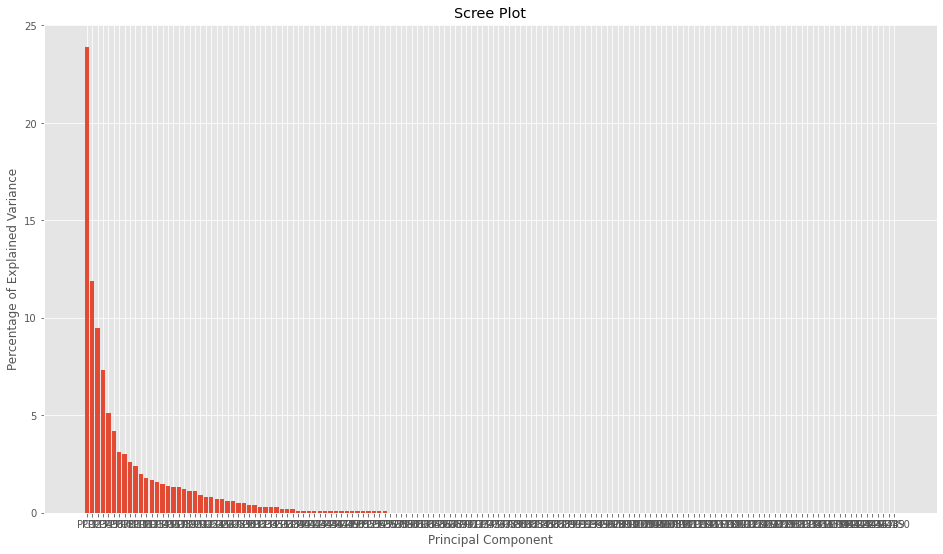

In [28]:
plt.bar(x=range(1, len(per_var_alldataset) + 1 ), height = per_var_alldataset, tick_label = labels_alldataset)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [29]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_alldataset_alldataset = pd.DataFrame(pca_data_alldataset, index = alldataset_dataset_10_10inst.columns , columns = labels_alldataset)

In [30]:
# Loading scores for PC1

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[0], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC1_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC1_df_alldataset = PC1_loading_scores_alldataset.to_frame()
PC1_df_alldataset = PC1_df_alldataset.rename(columns={0: 'Col_1'})
PC1_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[1], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values


PC2_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC2_df_alldataset = PC2_loading_scores_alldataset.to_frame()
PC2_df_alldataset = PC2_df_alldataset.rename(columns={0: 'Col_1'})
PC2_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[2], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC3_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC3_df_alldataset = PC3_loading_scores_alldataset.to_frame()
PC3_df_alldataset = PC3_df_alldataset.rename(columns={0: 'Col_1'})
PC3_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC4


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[3], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC4_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC4_df_alldataset = PC4_loading_scores_alldataset.to_frame()
PC4_df_alldataset = PC4_df_alldataset.rename(columns={0: 'Col_1'})
PC4_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[4], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)
top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC5_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC5_df_alldataset = PC5_loading_scores_alldataset.to_frame()
PC5_df_alldataset = PC5_df_alldataset.rename(columns={0: 'Col_1'})
PC5_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC6


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[5], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC6_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC6_df_alldataset = PC6_loading_scores_alldataset.to_frame()
PC6_df_alldataset = PC6_df_alldataset.rename(columns={0: 'Col_1'})
PC6_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC7


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[6], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC7_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC7_df_alldataset = PC7_loading_scores_alldataset.to_frame()
PC7_df_alldataset = PC7_df_alldataset.rename(columns={0: 'Col_1'})
PC7_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC8


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[7], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC8_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC8_df_alldataset = PC8_loading_scores_alldataset.to_frame()
PC8_df_alldataset = PC8_df_alldataset.rename(columns={0: 'Col_1'})
PC8_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC9

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[8], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC9_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC9_df_alldataset = PC9_loading_scores_alldataset.to_frame()
PC9_df_alldataset = PC9_df_alldataset.rename(columns={0: 'Col_1'})

PC9_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC10

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[9], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC10_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC10_df_alldataset = PC10_loading_scores_alldataset.to_frame()
PC10_df_alldataset = PC10_df_alldataset.rename(columns={0: 'Col_1'})
PC10_df_alldataset.reset_index(level=0, inplace=True)



In [31]:
###########

#calcular qué feature se repite más

PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)

dic = {}
for i in range(100):
    x = list(PCA_10components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\Te

{'feature_1075': 1,
 'feature_1061': 1,
 'feature_1000': 1,
 'feature_1150': 1,
 'feature_986': 1,
 'feature_1136': 1,
 'feature_1225': 1,
 'feature_911': 1,
 'feature_925': 1,
 'feature_1211': 1,
 'feature_467': 1,
 'feature_569': 1,
 'feature_565': 1,
 'feature_568': 1,
 'feature_566': 1,
 'feature_392': 1,
 'feature_570': 1,
 'feature_564': 1,
 'feature_542': 1,
 'feature_573': 1,
 'feature_361': 1,
 'feature_362': 1,
 'feature_360': 1,
 'feature_364': 1,
 'feature_365': 1,
 'feature_366': 1,
 'feature_358': 1,
 'feature_359': 1,
 'feature_368': 1,
 'feature_363': 1,
 'feature_306': 1,
 'feature_381': 1,
 'feature_305': 1,
 'feature_380': 1,
 'feature_231': 1,
 'feature_456': 1,
 'feature_230': 1,
 'feature_233': 1,
 'feature_455': 1,
 'feature_304': 1,
 'feature_964': 1,
 'feature_968': 1,
 'feature_960': 1,
 'feature_972': 1,
 'feature_967': 1,
 'feature_963': 1,
 'feature_961': 1,
 'feature_971': 1,
 'feature_969': 1,
 'feature_973': 1,
 'feature_129': 1,
 'feature_130': 1,
 'fea

In [32]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################

		
projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130','PC131','PC132','PC133','PC134','PC135','PC136','PC137','PC138','PC139','PC140','PC141','PC142','PC143','PC144','PC145','PC146','PC147','PC148','PC149','PC150'

    ],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
0,17.046135,9.526439,1.867172,-6.194179,5.821894,-1.178499,-1.305688,-3.204879,2.022838,0.065918,...,0.388918,0.071933,-0.040094,-0.309512,0.448008,0.268500,0.062367,0.437979,-0.006437,0.034752
1,20.460620,9.431808,2.352179,-5.524360,6.742372,-2.554066,-3.712503,-0.915104,2.321673,-0.889686,...,0.421433,0.129376,0.021206,-0.366832,0.526021,0.218767,-0.064113,0.457096,0.001498,0.119814
2,16.064227,9.295568,1.334403,-5.759820,5.949759,-1.440045,0.152126,-2.833455,3.246451,0.223564,...,0.381737,0.020986,0.020826,-0.350323,0.397508,0.194303,0.113874,0.340993,0.006410,0.065466
3,14.499745,8.388694,-1.785229,-4.399621,5.870756,0.182081,-2.121661,0.120875,3.985425,1.723362,...,0.422642,0.074808,0.030346,-0.359068,0.440965,0.132455,-0.026867,0.345864,-0.019490,0.057935
4,20.499129,7.910040,5.153752,-7.438366,5.604411,-2.143454,-2.823964,-1.665317,3.832416,1.084264,...,0.423284,0.142934,0.011247,-0.337856,0.583825,0.183480,0.011132,0.416756,-0.027367,0.087684


In [33]:
#Just take the 10 first components
PC10_10_10inst_alldataset = projection_alldataset.iloc[:,0:10]
PC10_10_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,17.046135,9.526439,1.867172,-6.194179,5.821894,-1.178499,-1.305688,-3.204879,2.022838,0.065918
1,20.460620,9.431808,2.352179,-5.524360,6.742372,-2.554066,-3.712503,-0.915104,2.321673,-0.889686
2,16.064227,9.295568,1.334403,-5.759820,5.949759,-1.440045,0.152126,-2.833455,3.246451,0.223564
3,14.499745,8.388694,-1.785229,-4.399621,5.870756,0.182081,-2.121661,0.120875,3.985425,1.723362
4,20.499129,7.910040,5.153752,-7.438366,5.604411,-2.143454,-2.823964,-1.665317,3.832416,1.084264


In [34]:

PC10_10_10inst_alldataset.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3'],True)

In [35]:
PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\2242510311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [36]:
PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC10_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\3033980328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,17.046135,9.526439,1.867172,-6.194179,5.821894,-1.178499,-1.305688,-3.204879,2.022838,0.065918,aprender
1,20.460620,9.431808,2.352179,-5.524360,6.742372,-2.554066,-3.712503,-0.915104,2.321673,-0.889686,aprender
2,16.064227,9.295568,1.334403,-5.759820,5.949759,-1.440045,0.152126,-2.833455,3.246451,0.223564,aprender
3,14.499745,8.388694,-1.785229,-4.399621,5.870756,0.182081,-2.121661,0.120875,3.985425,1.723362,aprender
4,20.499129,7.910040,5.153752,-7.438366,5.604411,-2.143454,-2.823964,-1.665317,3.832416,1.084264,aprender


In [37]:
print(pd.unique(PC10_10_10inst_alldataset['classes']))

X_PC10_10_10inst_alldataset= PC10_10_10inst_alldataset.iloc[:,:-1].values
y_PC10_10_10inst_alldataset=  PC10_10_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'cuánto' 'cómo' 'decir' 'dentro' 'emoción'
 'ese' 'fuerte' 'pensar' 'sentir' 'sí' 'tú' 'yo']


In [38]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC10_10_10inst_alldataset)
y_PC10_10_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo',
       'cómo', 'cómo', 'cómo', 'decir', 'decir', 'decir', 'decir',
       'decir', 'decir', 'decir', 'decir', 'decir', 'decir', 'dentro',
       'dentro', 'dentro', 'dentro', 'dentro', 'dentro', 'dentro',
       'dentro', 'dentro', 'dentro', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'ese', 'ese', 'ese', 'ese', 'ese', 'ese', 'ese', 'ese',
       'ese', 'ese', 'fuerte', 'fuerte', 'fuerte', 'fuerte', 'fuerte',
       'fuer

In [39]:
X_train_PC10_10_10inst_alldataset, X_test_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset = train_test_split(X_PC10_10_10inst_alldataset, y_PC10_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_alldataset = scaler.fit_transform(X_train_PC10_10_10inst_alldataset)
X_test_PC10_10_10inst_alldataset = scaler.transform(X_test_PC10_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x233700afc10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

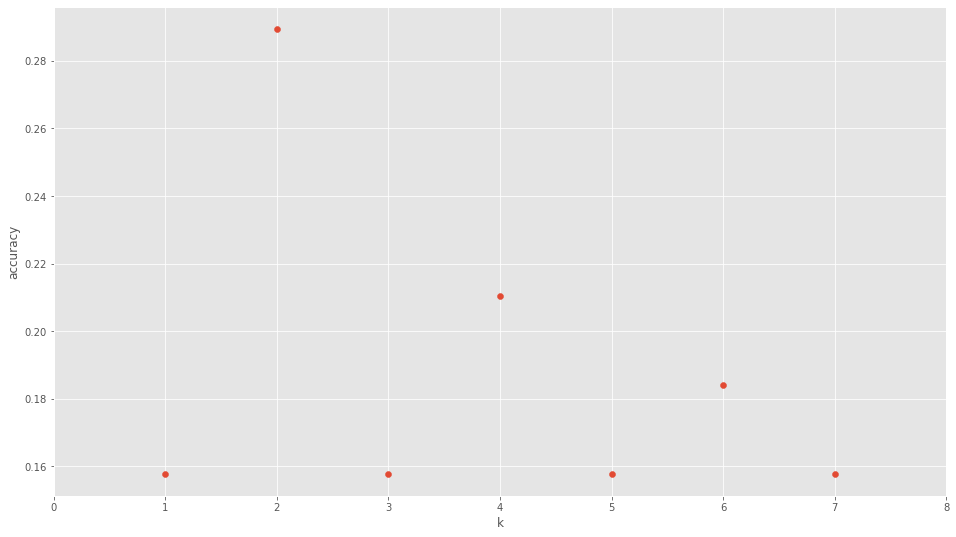

In [40]:
k_range_PC10_10_10inst_alldataset = range(1, 8)
scores_PC10_10_10inst_alldataset = []
for k in k_range_PC10_10_10inst_alldataset:
    knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
    scores_PC10_10_10inst_alldataset.append(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_alldataset, scores_PC10_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.16


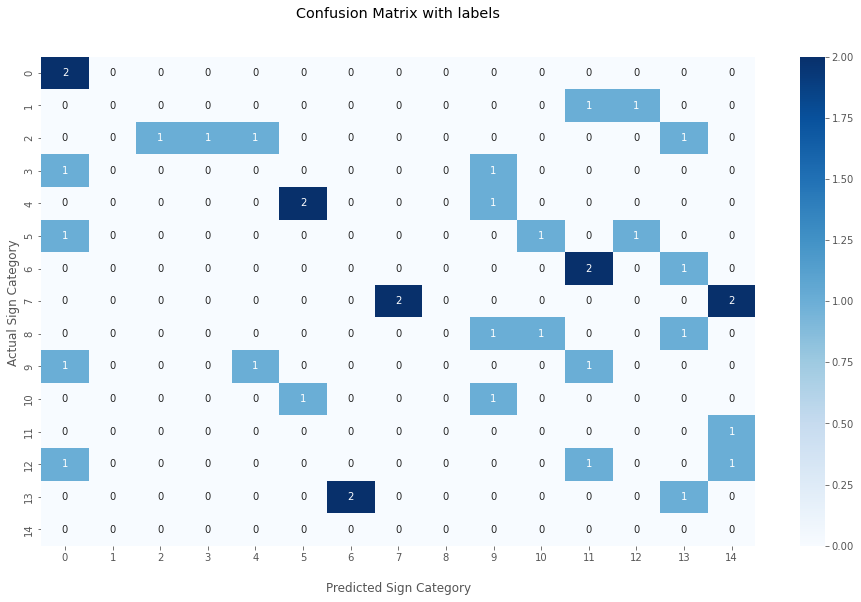

In [41]:
n_neighbors_PC10_10_10inst_alldataset = 1
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on test set: 0.29


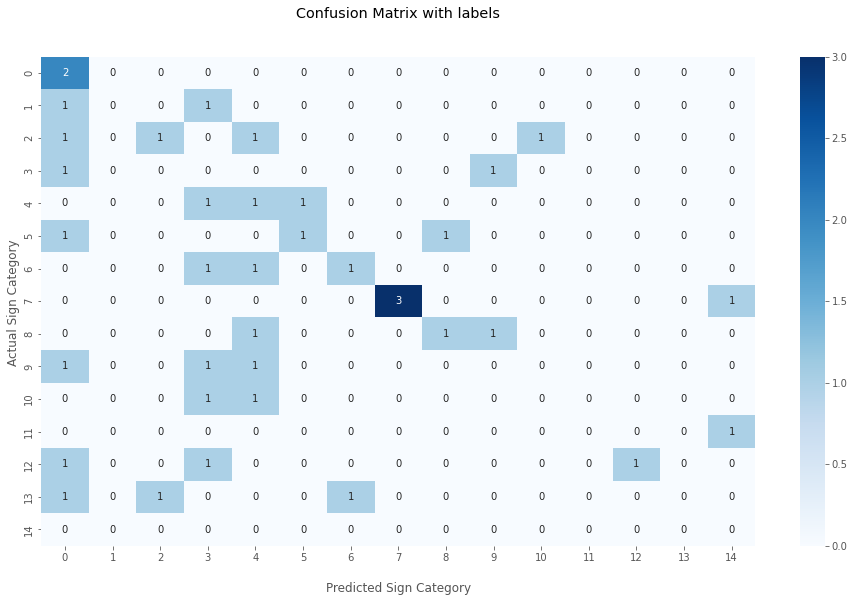

In [42]:
n_neighbors_PC10_10_10inst_alldataset = 2
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.48
Accuracy of K-NN classifier on test set: 0.16


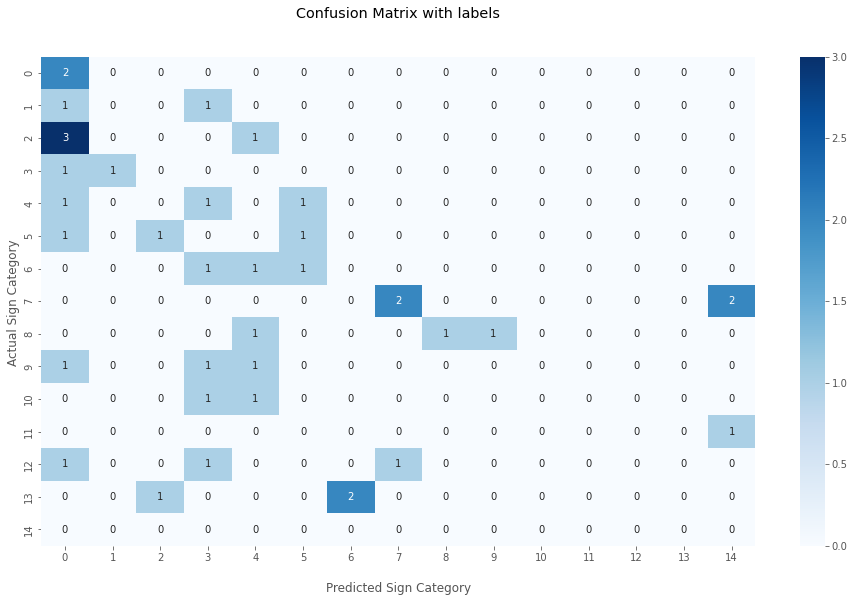

In [43]:
n_neighbors_PC10_10_10inst_alldataset = 3
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.38
Accuracy of K-NN classifier on test set: 0.16


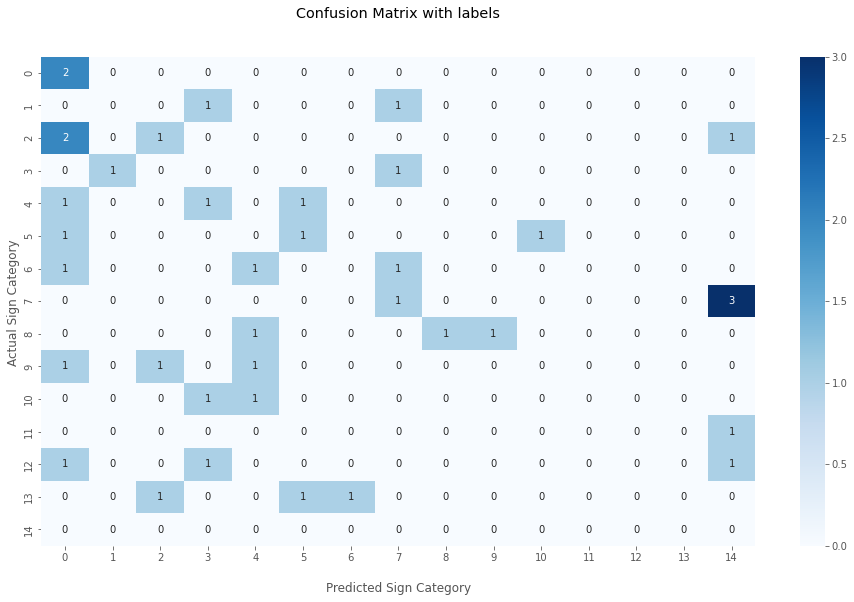

In [44]:
n_neighbors_PC10_10_10inst_alldataset = 5
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [45]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40','PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50','PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60','PC61','PC62','PC63','PC64','PC65','PC66','PC67','PC68','PC69','PC70','PC71','PC72','PC73','PC74','PC75','PC76','PC77','PC78','PC79','PC80','PC81','PC82','PC83','PC84','PC85','PC86','PC87','PC88','PC89','PC90','PC91','PC92','PC93','PC94','PC95','PC96','PC97','PC98','PC99','PC100','PC101','PC102','PC103','PC104','PC105','PC106','PC107','PC108','PC109','PC110','PC111','PC112','PC113','PC114','PC115','PC116','PC117','PC118','PC119','PC120','PC121','PC122','PC123','PC124','PC125','PC126','PC127','PC128','PC129','PC130','PC131','PC132','PC133','PC134','PC135','PC136','PC137','PC138','PC139','PC140','PC141','PC142','PC143','PC144','PC145','PC146','PC147','PC148','PC149','PC150'
],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149,PC150
0,17.046135,9.526439,1.867172,-6.194179,5.821894,-1.178499,-1.305688,-3.204879,2.022838,0.065918,...,0.388918,0.071933,-0.040094,-0.309512,0.448008,0.268500,0.062367,0.437979,-0.006437,0.034752
1,20.460620,9.431808,2.352179,-5.524360,6.742372,-2.554066,-3.712503,-0.915104,2.321673,-0.889686,...,0.421433,0.129376,0.021206,-0.366832,0.526021,0.218767,-0.064113,0.457096,0.001498,0.119814
2,16.064227,9.295568,1.334403,-5.759820,5.949759,-1.440045,0.152126,-2.833455,3.246451,0.223564,...,0.381737,0.020986,0.020826,-0.350323,0.397508,0.194303,0.113874,0.340993,0.006410,0.065466
3,14.499745,8.388694,-1.785229,-4.399621,5.870756,0.182081,-2.121661,0.120875,3.985425,1.723362,...,0.422642,0.074808,0.030346,-0.359068,0.440965,0.132455,-0.026867,0.345864,-0.019490,0.057935
4,20.499129,7.910040,5.153752,-7.438366,5.604411,-2.143454,-2.823964,-1.665317,3.832416,1.084264,...,0.423284,0.142934,0.011247,-0.337856,0.583825,0.183480,0.011132,0.416756,-0.027367,0.087684


In [46]:
PC6_10_10inst_alldataset = projection_alldataset.iloc[:,0:6]
PC6_10_10inst_alldataset.head()

PC6_10_10inst_alldataset.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27',
 'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466',
 'bien_147','bien_174','bien_230','bien_241','bien_244','bien_269',
 'bien_278','bien_329','bien_337','bien_416','comer_146','comer_164',
 'comer_313','comer_477','comer_484','comer_489','comer_705','comer_743',
 'comer_779','comer_86','cuánto_405','cuánto_420','cuánto_445',
 'cuánto_448','cuánto_456','cuánto_483','cuánto_706','cuánto_708',
 'cuánto_742','cuánto_744','cómo_12','cómo_171','cómo_223','cómo_230',
 'cómo_387','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','decir_101',
 'decir_138','decir_224','decir_265','decir_276','decir_321','decir_433',
 'decir_528','decir_755','decir_789','dentro_369','dentro_457',
 'dentro_486','dentro_55','dentro_566','dentro_596','dentro_603',
 'dentro_627','dentro_692','dentro_73','emoción_143','emoción_145',
 'emoción_249','emoción_272','emoción_281','emoción_43','emoción_45',
 'emoción_54','emoción_71','emoción_81','ese_100','ese_143','ese_214',
 'ese_385','ese_544','ese_608','ese_638','ese_642','ese_697','ese_719',
 'fuerte_152','fuerte_153','fuerte_240','fuerte_314','fuerte_361',
 'fuerte_362','fuerte_363','fuerte_571','fuerte_584','fuerte_588',
 'pensar_213','pensar_339','pensar_378','pensar_61','pensar_613',
 'pensar_623','pensar_66','pensar_761','pensar_771','pensar_97',
 'sentir_14','sentir_149','sentir_16','sentir_187','sentir_38',
 'sentir_458','sentir_570','sentir_591','sentir_604','sentir_89','sí_200',
 'sí_228','sí_240','sí_251','sí_277','sí_315','sí_37','sí_657','sí_659',
 'sí_76','tú_154','tú_176','tú_263','tú_277','tú_53','tú_635','tú_639',
 'tú_711','tú_778','tú_96','yo_113','yo_121','yo_123','yo_125','yo_152',
 'yo_164','yo_193','yo_235','yo_237','yo_3'],True)

In [47]:
PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\3551985106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [48]:
PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC6_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\1954860938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,17.046135,9.526439,1.867172,-6.194179,5.821894,-1.178499,aprender
1,20.460620,9.431808,2.352179,-5.524360,6.742372,-2.554066,aprender
2,16.064227,9.295568,1.334403,-5.759820,5.949759,-1.440045,aprender
3,14.499745,8.388694,-1.785229,-4.399621,5.870756,0.182081,aprender
4,20.499129,7.910040,5.153752,-7.438366,5.604411,-2.143454,aprender


In [49]:
print(pd.unique(PC6_10_10inst_alldataset['classes']))

X_PC6_10_10inst_alldataset= PC6_10_10inst_alldataset.iloc[:,:-1].values
y_PC6_10_10inst_alldataset=  PC6_10_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'cuánto' 'cómo' 'decir' 'dentro' 'emoción'
 'ese' 'fuerte' 'pensar' 'sentir' 'sí' 'tú' 'yo']


In [50]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC6_10_10inst_alldataset)
y_PC6_10_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'aprender',
       'aprender', 'aprender', 'aprender', 'aprender', 'aprender', 'bien',
       'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien', 'bien',
       'bien', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto', 'cuánto',
       'cuánto', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo', 'cómo',
       'cómo', 'cómo', 'cómo', 'decir', 'decir', 'decir', 'decir',
       'decir', 'decir', 'decir', 'decir', 'decir', 'decir', 'dentro',
       'dentro', 'dentro', 'dentro', 'dentro', 'dentro', 'dentro',
       'dentro', 'dentro', 'dentro', 'emoción', 'emoción', 'emoción',
       'emoción', 'emoción', 'emoción', 'emoción', 'emoción', 'emoción',
       'emoción', 'ese', 'ese', 'ese', 'ese', 'ese', 'ese', 'ese', 'ese',
       'ese', 'ese', 'fuerte', 'fuerte', 'fuerte', 'fuerte', 'fuerte',
       'fuer

In [51]:
X_train_PC6_10_10inst_alldataset, X_test_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset = train_test_split(X_PC6_10_10inst_alldataset, y_PC6_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_alldataset = scaler.fit_transform(X_train_PC6_10_10inst_alldataset)
X_test_PC6_10_10inst_alldataset = scaler.transform(X_test_PC6_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x2336d06b640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

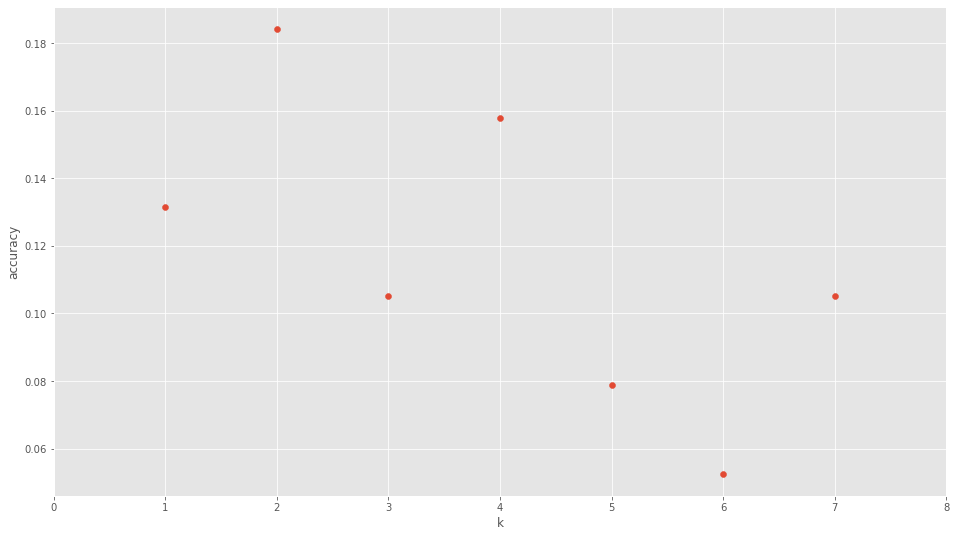

In [52]:
k_range_PC6_10_10inst_alldataset = range(1, 8)
scores_PC6_10_10inst_alldataset = []
for k in k_range_PC6_10_10inst_alldataset:
    knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
    scores_PC6_10_10inst_alldataset.append(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_alldataset, scores_PC6_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.13


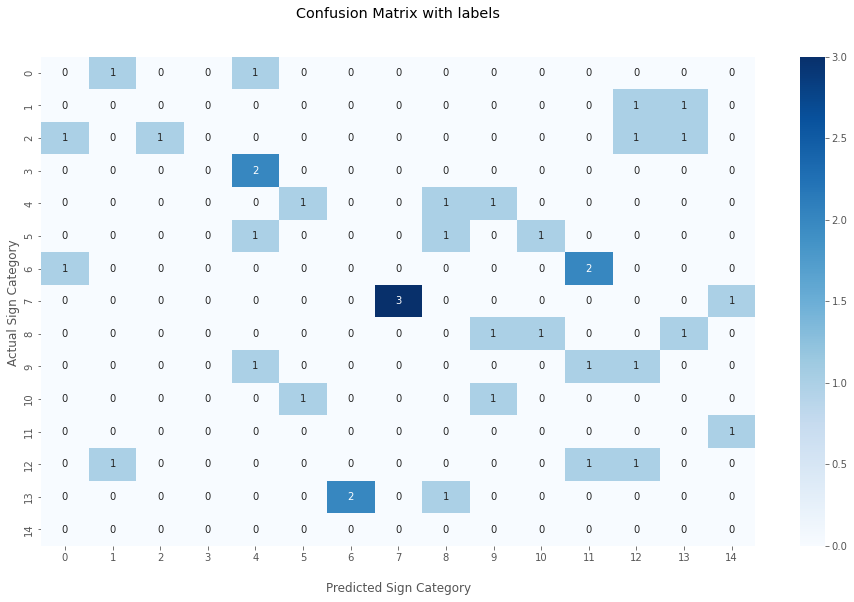

In [53]:
n_neighbors_PC6_10_10inst_alldataset = 1
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.59
Accuracy of K-NN classifier on test set: 0.18


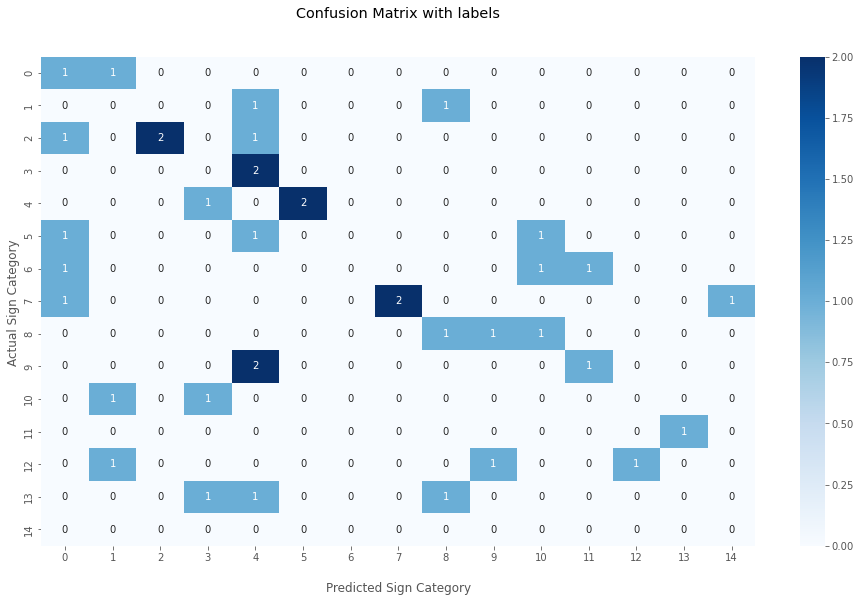

In [54]:
n_neighbors_PC6_10_10inst_alldataset = 2
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.46
Accuracy of K-NN classifier on test set: 0.11


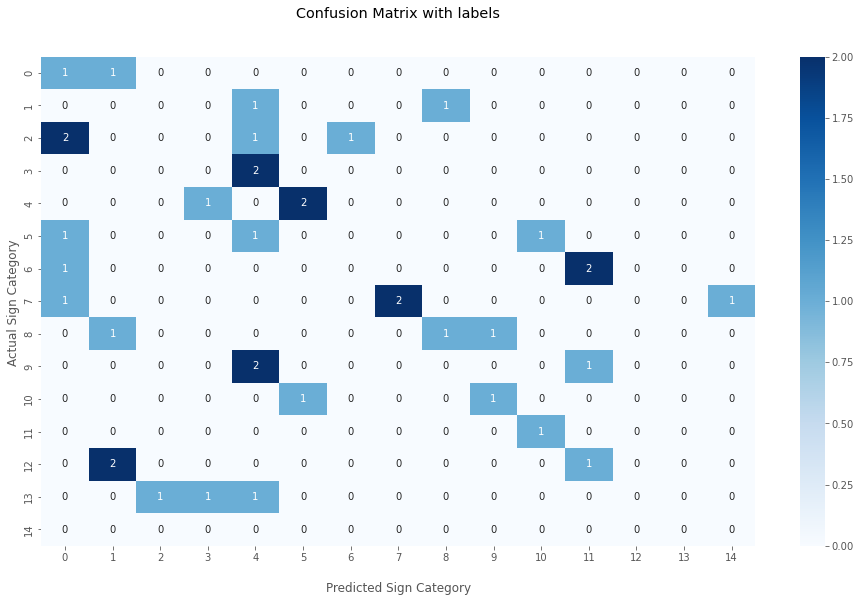

In [55]:
n_neighbors_PC6_10_10inst_alldataset = 3
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.40
Accuracy of K-NN classifier on test set: 0.08


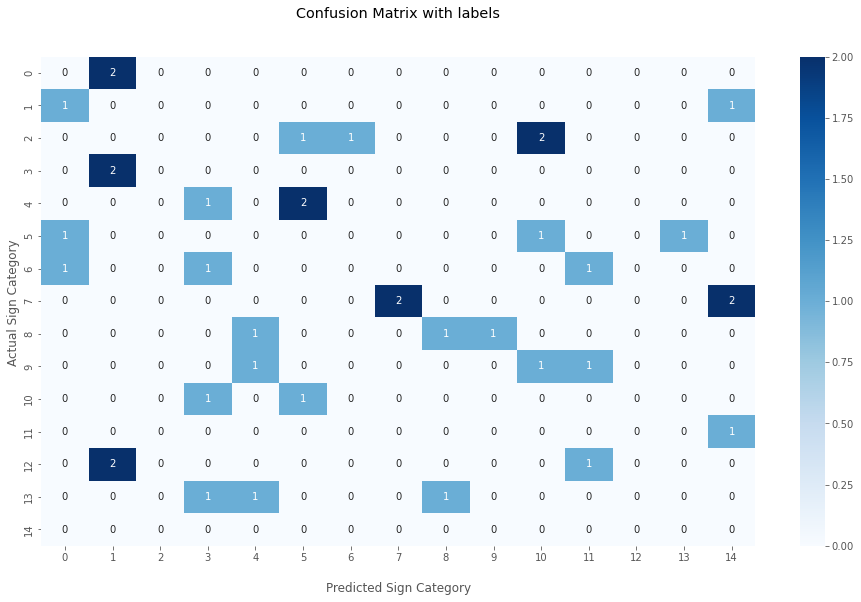

In [56]:
n_neighbors_PC6_10_10inst_alldataset = 5
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)

dic = {}
for i in range(60):
    x = list(PCA_6components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_7212\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alld

{'feature_1075': 1,
 'feature_1061': 1,
 'feature_1000': 1,
 'feature_1150': 1,
 'feature_986': 1,
 'feature_1136': 1,
 'feature_1225': 1,
 'feature_911': 1,
 'feature_925': 1,
 'feature_1211': 1,
 'feature_467': 1,
 'feature_569': 1,
 'feature_565': 1,
 'feature_568': 1,
 'feature_566': 1,
 'feature_392': 1,
 'feature_570': 1,
 'feature_564': 1,
 'feature_542': 1,
 'feature_573': 1,
 'feature_361': 1,
 'feature_362': 1,
 'feature_360': 1,
 'feature_364': 1,
 'feature_365': 1,
 'feature_366': 1,
 'feature_358': 1,
 'feature_359': 1,
 'feature_368': 1,
 'feature_363': 1,
 'feature_306': 1,
 'feature_381': 1,
 'feature_305': 1,
 'feature_380': 1,
 'feature_231': 1,
 'feature_456': 1,
 'feature_230': 1,
 'feature_233': 1,
 'feature_455': 1,
 'feature_304': 1,
 'feature_964': 1,
 'feature_968': 1,
 'feature_960': 1,
 'feature_972': 1,
 'feature_967': 1,
 'feature_963': 1,
 'feature_961': 1,
 'feature_971': 1,
 'feature_969': 1,
 'feature_973': 1,
 'feature_129': 1,
 'feature_130': 1,
 'fea

# At least 50 % of recognized fingers

In [58]:
df = pd.read_csv("C:/PSL_KNN/data_10_frames_10_instances_with_fingers_shaping.csv")

df['classes'] = df['videoname'].apply(lambda x: x.split('_')[0])
df['number'] = df['videoname'].apply(lambda x: x.split('_')[1])

n_uniq_videos = df['videoname'].nunique()

In [59]:
df

,videoname,n_frame,n_landmark,x,y,class,number,have_landmarks?,all_frames?,n_frames,n_instances,instance_to_use?,valid_frame?,classes
0,aprender_175,0,0,0.495806,0.201817,aprender,175,True,True,17,10,True,True,aprender
1,aprender_175,0,1,0.523832,0.167673,aprender,175,True,True,17,10,True,True,aprender
2,aprender_175,0,2,0.543781,0.169565,aprender,175,True,True,17,10,True,True,aprender
3,aprender_175,0,3,0.561008,0.171631,aprender,175,True,True,17,10,True,True,aprender
4,aprender_175,0,4,0.480482,0.162782,aprender,175,True,True,17,10,True,True,aprender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112495,tú_778,10,70,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112496,tú_778,10,71,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112497,tú_778,10,72,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112498,tú_778,10,73,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú


In [60]:
#df = pd.DataFrame(df, columns=['videoname', 'n_frame', 'n_landmark'])

In [61]:
#new_dataframe = df.groupby(['videoname'])

In [62]:
#new_dataframe

In [63]:
#new_dataframe.to_frame()

In [64]:
#Number of unique videos
n_uniq_videos 

150

In [65]:
#Counting the numbers of frames withouth fingers landmarks per video

#COMMENT THE LOGIC 

#Wer'e elimitating those that don't have at least 1 point
#Also, we're considering just 1 filter, x should be 1. We are not considering y=1 because if the joint does not have x axis, it will not have the y-axis either
#Finally, we're grouping by videoname, so this metric means: for "aprend_175" video, we have 42 frames that have at least 1 joint with with a column x that is equal to zero

frames_without_fingers_video = df.groupby(['videoname']).apply(lambda x: x[x['x'] == 1]['n_frame'].count())
frames_without_fingers_video


videoname
aprender_175     42
aprender_18     126
aprender_195     63
aprender_217     42
aprender_27     147
               ... 
yo_164            0
yo_193           21
yo_235            0
yo_237            0
yo_3             84
Length: 150, dtype: int64

In [66]:
df_videos = df.loc[(df.x==1)&(df.y==1),:].groupby(['videoname']).n_frame.nunique().reset_index()
#Validate just 10 frames per video
new_df = df.groupby(['videoname']).n_frame.nunique().reset_index()
new_df 

,videoname,n_frame
0,aprender_175,10
1,aprender_18,10
2,aprender_195,10
3,aprender_217,10
4,aprender_27,10
...,...,...
145,yo_164,10
146,yo_193,10
147,yo_235,10
148,yo_237,10


In [67]:
df_videos.rename(columns = {'n_frame' : 'n_frame_no_recuperados'}, inplace = True)
new_df.rename(columns = {'n_frame' : 'n_frame_total'}, inplace = True)

df_merge = new_df.merge(df_videos, how = 'left', on = 'videoname')

df_merge

,videoname,n_frame_total,n_frame_no_recuperados
0,aprender_175,10,2.0
1,aprender_18,10,6.0
2,aprender_195,10,3.0
3,aprender_217,10,2.0
4,aprender_27,10,6.0
...,...,...,...
145,yo_164,10,NaN
146,yo_193,10,1.0
147,yo_235,10,NaN
148,yo_237,10,NaN


In [68]:
#Number of videos with and without fingers
df_merge['videoname'].count()


150

In [69]:
#Number of videos without fingers
df_merge['n_frame_no_recuperados'].count()

123

In [70]:
# TOTAL (SUM) OF NOT RECOVERED FRAMES PER VIDEO
df_merge['n_frame_no_recuperados'].sum()

472.0

In [71]:
df_merge["porcentaje_no_recuperados"] = df_merge['n_frame_no_recuperados'] / df_merge['n_frame_total']

#Average of frames without fingers among all the videos
# TOTAL OF NOT RECOVERED FRAMES PER VIDEO : 472
# Number of videos without fingers: 123

#average of percentage on each video -> 150 videos

#123 / 472 = 26%

mean_frames_without_fingers = df_merge['n_frame_no_recuperados'].count() / df_merge['n_frame_no_recuperados'].sum()
mean_frames_without_fingers

0.2605932203389831

In [72]:
df_merge

,videoname,n_frame_total,n_frame_no_recuperados,porcentaje_no_recuperados
0,aprender_175,10,2.0,0.2
1,aprender_18,10,6.0,0.6
2,aprender_195,10,3.0,0.3
3,aprender_217,10,2.0,0.2
4,aprender_27,10,6.0,0.6
...,...,...,...,...
145,yo_164,10,NaN,NaN
146,yo_193,10,1.0,0.1
147,yo_235,10,NaN,NaN
148,yo_237,10,NaN,NaN


In [73]:
temp_1 = df_merge['porcentaje_no_recuperados'] >= 0.5

temp_2 = temp_1.to_frame()
temp_2.loc[:,["porcentaje_no_recuperados"]]


,porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [74]:
temp_2.rename(columns = {'porcentaje_no_recuperados':'boolean_porcentaje_no_recuperados'}, inplace = True)

In [75]:
temp_2

,boolean_porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [76]:
#count trues
temp_2.boolean_porcentaje_no_recuperados.value_counts()

AttributeError: 'DataFrame' object has no attribute 'porcentaje_no_recuperados'

In [ ]:
temp_2

,porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
df_merge.insert(loc=1, column="boolean_porcentaje_no_recuperados", value=temp_2)


In [ ]:
df_merge.head()

,videoname,boolean_porcentaje_no_recuperados,n_frame_total,n_frame_no_recuperados,porcentaje_no_recuperados
0,aprender_175,False,10,2.0,0.2
1,aprender_18,True,10,6.0,0.6
2,aprender_195,False,10,3.0,0.3
3,aprender_217,False,10,2.0,0.2
4,aprender_27,True,10,6.0,0.6


In [ ]:
df_false = df_merge.loc[(df_merge.boolean_porcentaje_no_recuperados==False)]

In [ ]:
df_videoname = df_false['videoname']

In [ ]:
type(df_merge)

pandas.core.frame.DataFrame

In [ ]:
type(temp_2)

pandas.core.frame.DataFrame

In [ ]:
#df.append(temp_2, ignore_index=True)

In [ ]:
#df.drop(df[df.porcentaje_ < 50].index, inplace=True)

In [ ]:
count_trues = temp_2['porcentaje_no_recuperados'].sum()

In [ ]:
'''
Metrics without fingers% 
1. 25.3% of videos have more than 50% of their frames without the finger joints.
2. 74.7% of videos have more than 50% of their frames with the finger joints.
'''

metrics_without_fingers = count_trues / df_merge['videoname'].count()
metrics_without_fingers

0.25333333333333335

In [ ]:
#GET RID OF THOSE ONES

In [ ]:
#videoname_to_drop = df_videoname.to_list()